In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the csv data
data = pd.read_csv("ads_statistics.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   platform_id         7351 non-null   int64  
 1   video_id            7351 non-null   int64  
 2   watch_count         7351 non-null   int64  
 3   total_time_watched  7351 non-null   int64  
 4   price_per_watch     7351 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 287.3 KB


In [4]:
# View parts of the data
data.head(n=10)

,platform_id,video_id,watch_count,total_time_watched,price_per_watch
0,131,744,658372,32260228,0.16
1,160,917,1998,21978,0.17
2,114,1368,794635,38937115,0.21
3,162,102,1498,85386,0.20
4,85,1600,308172,15716772,0.21
5,3,1840,214430,12651370,0.20
6,65,555,960122,25923294,0.35
7,72,364,763657,34364565,0.29
8,159,960,1516,51544,0.30
9,128,540,399701,16787442,0.21


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
platform_id,7351.0,1.064805e+02,5.374735e+01,0.0,60.0,120.0,159.0,202.0
video_id,7351.0,1.003182e+03,5.748381e+02,0.0,513.0,1004.0,1503.0,1999.0
watch_count,7351.0,3.275165e+05,3.318385e+05,1273.0,1511.0,232564.0,615489.5,999503.0
total_time_watched,7351.0,9.734383e+06,1.221817e+07,7475.0,66148.5,4727547.0,15580605.0,59342040.0
price_per_watch,7351.0,2.994205e-01,1.154367e-01,0.1,0.2,0.3,0.4,0.5


In [6]:
min_price_per_watch = data[(data.loc[:, "price_per_watch"]) == (data.loc[:, "price_per_watch"].min())]

In [7]:
min_price_per_watch.value_counts().T

platform_id  video_id  watch_count  total_time_watched  price_per_watch
1            1600      253426       12924726            0.1                1
158          628       1501         43529               0.1                1
159          1407      1509         12072               0.1                1
             1261      1511         18132               0.1                1
             395       1510         39260               0.1                1
                                                                          ..
94           281       553619       13840475            0.1                1
92           1994      126332       5937604             0.1                1
77           709       864901       47569555            0.1                1
75           166       703323       5626584             0.1                1
162          1998      1500         52500               0.1                1
Length: 101, dtype: int64

In [8]:
# Check for Correlation amongst the columns
data.corr()

,platform_id,video_id,watch_count,total_time_watched,price_per_watch
platform_id,1.000000,0.012139,-0.522790,-0.415722,0.008332
video_id,0.012139,1.000000,-0.013134,0.002986,0.008007
watch_count,-0.522790,-0.013134,1.000000,0.810730,0.006526
total_time_watched,-0.415722,0.002986,0.810730,1.000000,0.004648
price_per_watch,0.008332,0.008007,0.006526,0.004648,1.000000


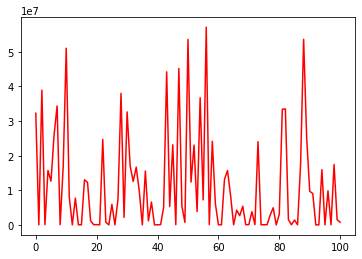

In [9]:
# Plot the two columns to have a better idea of the movement of the data

total_time_watched = data.loc[0:100, "total_time_watched"]
watch_count = data.loc[0:100, "watch_count"]
price = data.loc[0:100, "price_per_watch"]

plt.plot(total_time_watched, color="red")

plt.show()

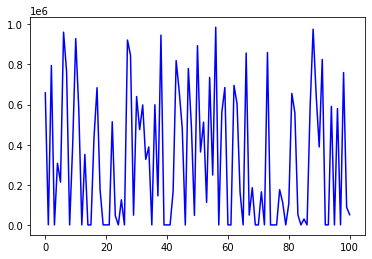

In [10]:
plt.plot(watch_count, color="blue")

plt.show()

In [11]:
# Let's find out the average time watched for each video

data.loc[:, "average_watch_time"] = (data.loc[:, "total_time_watched"]) / (data.loc[:, "watch_count"]) 

In [12]:
data

,platform_id,video_id,watch_count,total_time_watched,price_per_watch,average_watch_time
0,131,744,658372,32260228,0.16,49.0
1,160,917,1998,21978,0.17,11.0
2,114,1368,794635,38937115,0.21,49.0
3,162,102,1498,85386,0.20,57.0
4,85,1600,308172,15716772,0.21,51.0
...,...,...,...,...,...,...
7346,198,965,909922,16378596,0.12,18.0
7347,199,1327,451830,7681110,0.38,17.0
7348,200,1993,633510,23439870,0.48,37.0
7349,201,822,295829,12720647,0.48,43.0


In [13]:
data.loc[:, "total_price_per_watch"] = (data.loc[:, "total_time_watched"]) * (data.loc[:, "price_per_watch"])

In [14]:
data

,platform_id,video_id,watch_count,total_time_watched,price_per_watch,average_watch_time,total_price_per_watch
0,131,744,658372,32260228,0.16,49.0,5161636.48
1,160,917,1998,21978,0.17,11.0,3736.26
2,114,1368,794635,38937115,0.21,49.0,8176794.15
3,162,102,1498,85386,0.20,57.0,17077.20
4,85,1600,308172,15716772,0.21,51.0,3300522.12
...,...,...,...,...,...,...,...
7346,198,965,909922,16378596,0.12,18.0,1965431.52
7347,199,1327,451830,7681110,0.38,17.0,2918821.80
7348,200,1993,633510,23439870,0.48,37.0,11251137.60
7349,201,822,295829,12720647,0.48,43.0,6105910.56


In [16]:
data.loc[:, "price_per_watch"].mean() * 49

14.671603863419943

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
platform_id,7351.0,1.064805e+02,5.374735e+01,0.0,60.00,120.00,159.00,202.0
video_id,7351.0,1.003182e+03,5.748381e+02,0.0,513.00,1004.00,1503.00,1999.0
watch_count,7351.0,3.275165e+05,3.318385e+05,1273.0,1511.00,232564.00,615489.50,999503.0
total_time_watched,7351.0,9.734383e+06,1.221817e+07,7475.0,66148.50,4727547.00,15580605.00,59342040.0
price_per_watch,7351.0,2.994205e-01,1.154367e-01,0.1,0.20,0.30,0.40,0.5
average_watch_time,7351.0,2.978438e+01,1.540030e+01,5.0,17.00,28.00,42.00,60.0
total_price_per_watch,7351.0,2.921229e+06,4.060745e+06,751.5,18756.16,1231262.32,4272234.26,27977623.0


In [31]:
average_price_per_watch = data.loc[:, "price_per_watch"].mean()

In [32]:
def above_average(row):
  message = ""
  if row < average_price_per_watch:
    message = "below average"
  else:
    message = "above average"
  return message

In [34]:
data.loc[:, "above_average"] = data.price_per_watch.apply(above_average)

In [35]:
data

,platform_id,video_id,watch_count,total_time_watched,price_per_watch,average_watch_time,total_price_per_watch,above_average
0,131,744,658372,32260228,0.16,49.0,5161636.48,below average
1,160,917,1998,21978,0.17,11.0,3736.26,below average
2,114,1368,794635,38937115,0.21,49.0,8176794.15,below average
3,162,102,1498,85386,0.20,57.0,17077.20,below average
4,85,1600,308172,15716772,0.21,51.0,3300522.12,below average
...,...,...,...,...,...,...,...,...
7346,198,965,909922,16378596,0.12,18.0,1965431.52,below average
7347,199,1327,451830,7681110,0.38,17.0,2918821.80,above average
7348,200,1993,633510,23439870,0.48,37.0,11251137.60,above average
7349,201,822,295829,12720647,0.48,43.0,6105910.56,above average
